In [1]:
import os

import torch

from MResNet import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

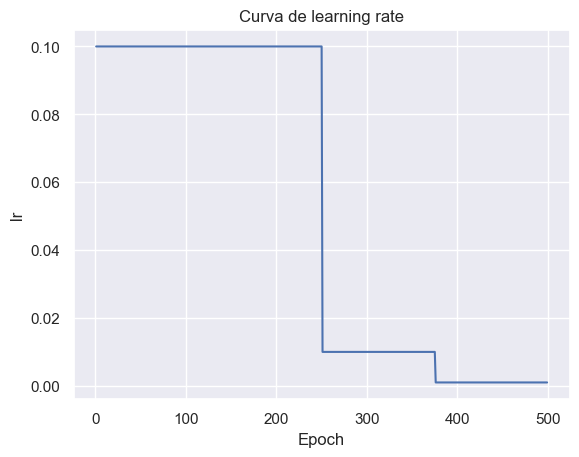

In [2]:
xs = [*range(1,500)]
ys = [lr_control({250: 0.1, 375: 0.01, 500: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-56

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck, BasicBlockWithDeathRate
from MResNet import MResNet

In [5]:
net = MResNet(BasicBlockWithDeathRate, [9,9,9], num_classes=10, stochastic_depth=True, PL=0.8, pretrain=False)
net.cuda()
model_name = "MResNet56-SD"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

[0.0, 0.007692307692307691, 0.015384615384615382, 0.023076923076923075, 0.030769230769230764, 0.03846153846153846, 0.04615384615384615, 0.05384615384615383, 0.06153846153846153, 0.0692307692307692, 0.07692307692307691, 0.08461538461538459, 0.0923076923076923, 0.09999999999999998, 0.10769230769230766, 0.11538461538461535, 0.12307692307692306, 0.13076923076923075, 0.1384615384615384, 0.1461538461538461, 0.15384615384615383, 0.16153846153846152, 0.16923076923076918, 0.17692307692307688, 0.1846153846153846, 0.19230769230769226, 0.19999999999999996]


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,115                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlockWithDeathRate: 2-1      [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 0.1, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {250: 0.1, 375: 0.01, 500: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(500):  # 100
    Trainer.train()

391it [00:31, 12.44it/s]

Epoch 1 finished, average loss: 0.0126339814
Starting testing


Correct: 4657, total: 10000, accuracy: 0.4657000005, average loss: 0.0118704292


391it [00:31, 12.35it/s]

Epoch 2 finished, average loss: 0.0089324784
Starting testing


Correct: 6245, total: 10000, accuracy: 0.6244999766, average loss: 0.0083975539


391it [00:31, 12.38it/s]

Epoch 3 finished, average loss: 0.0073775848
Starting testing


Correct: 6723, total: 10000, accuracy: 0.6722999811, average loss: 0.0072446453


391it [00:31, 12.37it/s]

Epoch 4 finished, average loss: 0.0064001673
Starting testing


Correct: 7284, total: 10000, accuracy: 0.7283999920, average loss: 0.0060914761


391it [00:31, 12.40it/s]

Epoch 5 finished, average loss: 0.0057536813
Starting testing


Correct: 7072, total: 10000, accuracy: 0.7071999907, average loss: 0.0070559121


391it [00:31, 12.55it/s]

Epoch 6 finished, average loss: 0.0052515640
Starting testing


Correct: 7109, total: 10000, accuracy: 0.7109000087, average loss: 0.0066248363


391it [00:30, 12.64it/s]

Epoch 7 finished, average loss: 0.0047911819
Starting testing


Correct: 7917, total: 10000, accuracy: 0.7917000055, average loss: 0.0048840522


391it [00:30, 12.86it/s]

Epoch 8 finished, average loss: 0.0044459388
Starting testing


Correct: 8052, total: 10000, accuracy: 0.8051999807, average loss: 0.0044799773


391it [00:31, 12.45it/s]

Epoch 9 finished, average loss: 0.0042803869
Starting testing


Correct: 7854, total: 10000, accuracy: 0.7853999734, average loss: 0.0050270259


391it [00:31, 12.39it/s]

Epoch 10 finished, average loss: 0.0040010243
Starting testing


Correct: 7908, total: 10000, accuracy: 0.7907999754, average loss: 0.0047693893


391it [00:31, 12.44it/s]

Epoch 11 finished, average loss: 0.0038215041
Starting testing


Correct: 8167, total: 10000, accuracy: 0.8166999817, average loss: 0.0043586467


391it [00:29, 13.42it/s]

Epoch 12 finished, average loss: 0.0036818805
Starting testing


Correct: 7970, total: 10000, accuracy: 0.7969999909, average loss: 0.0046940311


391it [00:29, 13.14it/s]

Epoch 13 finished, average loss: 0.0035264600
Starting testing


Correct: 7949, total: 10000, accuracy: 0.7949000001, average loss: 0.0049994393


391it [00:31, 12.34it/s]

Epoch 14 finished, average loss: 0.0033719582
Starting testing


Correct: 8435, total: 10000, accuracy: 0.8434999585, average loss: 0.0036189907


391it [00:31, 12.44it/s]

Epoch 15 finished, average loss: 0.0033084210
Starting testing


Correct: 8431, total: 10000, accuracy: 0.8430999517, average loss: 0.0037208896


391it [00:30, 12.94it/s]

Epoch 16 finished, average loss: 0.0032197034
Starting testing


Correct: 8437, total: 10000, accuracy: 0.8436999917, average loss: 0.0036197398


391it [00:29, 13.44it/s]

Epoch 17 finished, average loss: 0.0030834843
Starting testing


Correct: 8585, total: 10000, accuracy: 0.8585000038, average loss: 0.0032763283


391it [00:28, 13.67it/s]

Epoch 18 finished, average loss: 0.0030187253
Starting testing


Correct: 8535, total: 10000, accuracy: 0.8534999490, average loss: 0.0034387987


391it [00:28, 13.90it/s]

Epoch 19 finished, average loss: 0.0029647487
Starting testing


Correct: 8329, total: 10000, accuracy: 0.8328999877, average loss: 0.0041579412


391it [00:27, 13.97it/s]

Epoch 20 finished, average loss: 0.0028647090
Starting testing


Correct: 8484, total: 10000, accuracy: 0.8483999968, average loss: 0.0036326427


391it [00:28, 13.66it/s]

Epoch 21 finished, average loss: 0.0028143485
Starting testing


Correct: 8543, total: 10000, accuracy: 0.8542999625, average loss: 0.0034603801


391it [00:27, 14.22it/s]

Epoch 22 finished, average loss: 0.0027633942
Starting testing


Correct: 8504, total: 10000, accuracy: 0.8503999710, average loss: 0.0035253143


391it [00:27, 14.16it/s]

Epoch 23 finished, average loss: 0.0026737735
Starting testing


Correct: 8390, total: 10000, accuracy: 0.8389999866, average loss: 0.0038491828


391it [00:27, 14.29it/s]

Epoch 24 finished, average loss: 0.0026153722
Starting testing


Correct: 8576, total: 10000, accuracy: 0.8575999737, average loss: 0.0033774651


391it [00:28, 13.91it/s]

Epoch 25 finished, average loss: 0.0025712078
Starting testing


Correct: 8724, total: 10000, accuracy: 0.8723999858, average loss: 0.0029676676


391it [00:28, 13.77it/s]

Epoch 26 finished, average loss: 0.0025885834
Starting testing


Correct: 8243, total: 10000, accuracy: 0.8242999911, average loss: 0.0043100720


391it [00:27, 14.04it/s]

Epoch 27 finished, average loss: 0.0025313844
Starting testing


Correct: 8588, total: 10000, accuracy: 0.8587999940, average loss: 0.0033263205


391it [00:27, 13.97it/s]

Epoch 28 finished, average loss: 0.0024723285
Starting testing


Correct: 8544, total: 10000, accuracy: 0.8543999791, average loss: 0.0036839976


391it [00:27, 14.16it/s]

Epoch 29 finished, average loss: 0.0023942216
Starting testing


Correct: 8657, total: 10000, accuracy: 0.8657000065, average loss: 0.0031532528


391it [00:28, 13.87it/s]

Epoch 30 finished, average loss: 0.0023745901
Starting testing


Correct: 8741, total: 10000, accuracy: 0.8740999699, average loss: 0.0030026964


391it [00:28, 13.96it/s]

Epoch 31 finished, average loss: 0.0023161867
Starting testing


Correct: 8645, total: 10000, accuracy: 0.8644999862, average loss: 0.0032503076


391it [00:28, 13.78it/s]

Epoch 32 finished, average loss: 0.0023270960
Starting testing


Correct: 8273, total: 10000, accuracy: 0.8272999525, average loss: 0.0042345838


391it [00:28, 13.82it/s]

Epoch 33 finished, average loss: 0.0023004602
Starting testing


Correct: 8337, total: 10000, accuracy: 0.8337000012, average loss: 0.0038942881


391it [00:30, 12.64it/s]

Epoch 34 finished, average loss: 0.0022830275
Starting testing


Correct: 8816, total: 10000, accuracy: 0.8815999627, average loss: 0.0028971039


391it [00:31, 12.29it/s]

Epoch 35 finished, average loss: 0.0022036587
Starting testing


Correct: 8833, total: 10000, accuracy: 0.8833000064, average loss: 0.0026769306


391it [00:31, 12.57it/s]

Epoch 36 finished, average loss: 0.0022102897
Starting testing


Correct: 8466, total: 10000, accuracy: 0.8465999961, average loss: 0.0037771850


391it [00:30, 12.86it/s]

Epoch 37 finished, average loss: 0.0021705392
Starting testing


Correct: 8661, total: 10000, accuracy: 0.8660999537, average loss: 0.0032126577


391it [00:31, 12.57it/s]

Epoch 38 finished, average loss: 0.0021601226
Starting testing


Correct: 8569, total: 10000, accuracy: 0.8568999767, average loss: 0.0035025683


391it [00:30, 12.62it/s]

Epoch 39 finished, average loss: 0.0021239296
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0028003873


391it [00:30, 12.83it/s]

Epoch 40 finished, average loss: 0.0021326432
Starting testing


Correct: 8852, total: 10000, accuracy: 0.8851999640, average loss: 0.0028450158


391it [00:31, 12.37it/s]

Epoch 41 finished, average loss: 0.0021021144
Starting testing


Correct: 8498, total: 10000, accuracy: 0.8497999907, average loss: 0.0036667886


391it [00:31, 12.24it/s]


Epoch 42 finished, average loss: 0.0020154760
Starting testing
Correct: 8750, total: 10000, accuracy: 0.8750000000, average loss: 0.0031410281


391it [00:31, 12.29it/s]

Epoch 43 finished, average loss: 0.0020781060
Starting testing


Correct: 8744, total: 10000, accuracy: 0.8743999600, average loss: 0.0030067372


391it [00:30, 12.75it/s]

Epoch 44 finished, average loss: 0.0020548237
Starting testing


Correct: 8798, total: 10000, accuracy: 0.8797999620, average loss: 0.0028366494


391it [00:30, 13.00it/s]

Epoch 45 finished, average loss: 0.0020269490
Starting testing


Correct: 8761, total: 10000, accuracy: 0.8761000037, average loss: 0.0030034951


391it [00:28, 13.77it/s]

Epoch 46 finished, average loss: 0.0020375126
Starting testing


Correct: 8754, total: 10000, accuracy: 0.8754000068, average loss: 0.0028891263


391it [00:30, 12.99it/s]

Epoch 47 finished, average loss: 0.0019965467
Starting testing


Correct: 8762, total: 10000, accuracy: 0.8761999607, average loss: 0.0029394713


391it [00:27, 14.05it/s]

Epoch 48 finished, average loss: 0.0019995578
Starting testing


Correct: 8776, total: 10000, accuracy: 0.8775999546, average loss: 0.0028198609


391it [00:27, 14.07it/s]


Epoch 49 finished, average loss: 0.0019879772
Starting testing
Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0027998627


391it [00:27, 14.12it/s]

Epoch 50 finished, average loss: 0.0019301046
Starting testing


Correct: 8834, total: 10000, accuracy: 0.8833999634, average loss: 0.0028137840


391it [00:27, 14.14it/s]

Epoch 51 finished, average loss: 0.0019896856
Starting testing


Correct: 8911, total: 10000, accuracy: 0.8910999894, average loss: 0.0024635562


391it [00:27, 14.13it/s]

Epoch 52 finished, average loss: 0.0018992691
Starting testing


Correct: 8654, total: 10000, accuracy: 0.8653999567, average loss: 0.0032224169


391it [00:27, 14.18it/s]

Epoch 53 finished, average loss: 0.0019014987
Starting testing


Correct: 8800, total: 10000, accuracy: 0.8799999952, average loss: 0.0027945890


391it [00:28, 13.88it/s]

Epoch 54 finished, average loss: 0.0018806993
Starting testing


Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0028105116


391it [00:28, 13.89it/s]

Epoch 55 finished, average loss: 0.0018809546
Starting testing


Correct: 8844, total: 10000, accuracy: 0.8843999505, average loss: 0.0026997788


391it [00:28, 13.50it/s]

Epoch 56 finished, average loss: 0.0018852178
Starting testing


Correct: 8740, total: 10000, accuracy: 0.8739999533, average loss: 0.0031683931


391it [00:28, 13.64it/s]

Epoch 57 finished, average loss: 0.0018645222
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0026461058


391it [00:28, 13.71it/s]

Epoch 58 finished, average loss: 0.0018834046
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0027481584


391it [00:28, 13.64it/s]

Epoch 59 finished, average loss: 0.0018360299
Starting testing


Correct: 8860, total: 10000, accuracy: 0.8859999776, average loss: 0.0027704199


391it [00:30, 12.90it/s]

Epoch 60 finished, average loss: 0.0018510402
Starting testing


Correct: 8917, total: 10000, accuracy: 0.8916999698, average loss: 0.0025431607


391it [00:30, 13.02it/s]


Epoch 61 finished, average loss: 0.0018137140
Starting testing
Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0028068865


391it [00:27, 14.03it/s]

Epoch 62 finished, average loss: 0.0018024841
Starting testing


Correct: 8763, total: 10000, accuracy: 0.8762999773, average loss: 0.0030170048


391it [00:27, 13.97it/s]


Epoch 63 finished, average loss: 0.0018359901
Starting testing
Correct: 8825, total: 10000, accuracy: 0.8824999928, average loss: 0.0027801688


391it [00:28, 13.91it/s]

Epoch 64 finished, average loss: 0.0017768081
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0027718944


391it [00:28, 13.71it/s]

Epoch 65 finished, average loss: 0.0017571665
Starting testing


Correct: 8736, total: 10000, accuracy: 0.8736000061, average loss: 0.0032355358


391it [00:30, 12.65it/s]

Epoch 66 finished, average loss: 0.0017705605
Starting testing


Correct: 8877, total: 10000, accuracy: 0.8876999617, average loss: 0.0027512746


391it [00:28, 13.88it/s]

Epoch 67 finished, average loss: 0.0017852560
Starting testing


Correct: 8824, total: 10000, accuracy: 0.8823999763, average loss: 0.0027016748


391it [00:28, 13.91it/s]

Epoch 68 finished, average loss: 0.0017517391
Starting testing


Correct: 8683, total: 10000, accuracy: 0.8682999611, average loss: 0.0033885890


391it [00:30, 12.76it/s]

Epoch 69 finished, average loss: 0.0017806563
Starting testing


Correct: 8756, total: 10000, accuracy: 0.8755999804, average loss: 0.0029105252


391it [00:31, 12.29it/s]

Epoch 70 finished, average loss: 0.0017132015
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0027710753


391it [00:31, 12.57it/s]

Epoch 71 finished, average loss: 0.0017926044
Starting testing


Correct: 8770, total: 10000, accuracy: 0.8769999743, average loss: 0.0029137854


391it [00:30, 12.88it/s]

Epoch 72 finished, average loss: 0.0017077202
Starting testing


Correct: 8594, total: 10000, accuracy: 0.8593999743, average loss: 0.0033570336


391it [00:30, 12.81it/s]

Epoch 73 finished, average loss: 0.0016842355
Starting testing


Correct: 8883, total: 10000, accuracy: 0.8883000016, average loss: 0.0026705427


391it [00:31, 12.52it/s]

Epoch 74 finished, average loss: 0.0017272353
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0027030815


391it [00:31, 12.46it/s]

Epoch 75 finished, average loss: 0.0017168323
Starting testing


Correct: 8916, total: 10000, accuracy: 0.8915999532, average loss: 0.0025631564


391it [00:30, 12.75it/s]

Epoch 76 finished, average loss: 0.0016947577
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0026768162


391it [00:30, 12.70it/s]

Epoch 77 finished, average loss: 0.0017512594
Starting testing


Correct: 8890, total: 10000, accuracy: 0.8889999986, average loss: 0.0027547198


391it [00:30, 12.83it/s]

Epoch 78 finished, average loss: 0.0016993033
Starting testing


Correct: 8902, total: 10000, accuracy: 0.8901999593, average loss: 0.0026011891


391it [00:30, 12.96it/s]

Epoch 79 finished, average loss: 0.0016359355
Starting testing


Correct: 8757, total: 10000, accuracy: 0.8756999969, average loss: 0.0028907329


391it [00:29, 13.42it/s]

Epoch 80 finished, average loss: 0.0017017846
Starting testing


Correct: 8909, total: 10000, accuracy: 0.8908999562, average loss: 0.0026016730


391it [00:28, 13.84it/s]

Epoch 81 finished, average loss: 0.0016729009
Starting testing


Correct: 8837, total: 10000, accuracy: 0.8836999536, average loss: 0.0028796831


391it [00:28, 13.92it/s]

Epoch 82 finished, average loss: 0.0016758024
Starting testing


Correct: 8918, total: 10000, accuracy: 0.8917999864, average loss: 0.0025386576


391it [00:27, 14.09it/s]

Epoch 83 finished, average loss: 0.0017063939
Starting testing


Correct: 8775, total: 10000, accuracy: 0.8774999976, average loss: 0.0029515781


391it [00:28, 13.89it/s]

Epoch 84 finished, average loss: 0.0016100293
Starting testing


Correct: 8939, total: 10000, accuracy: 0.8938999772, average loss: 0.0024417383


391it [00:31, 12.46it/s]

Epoch 85 finished, average loss: 0.0016689624
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0024711596


391it [00:31, 12.41it/s]

Epoch 86 finished, average loss: 0.0016105888
Starting testing


Correct: 8827, total: 10000, accuracy: 0.8826999664, average loss: 0.0027157263


391it [00:29, 13.43it/s]

Epoch 87 finished, average loss: 0.0015635744
Starting testing


Correct: 8707, total: 10000, accuracy: 0.8707000017, average loss: 0.0032361974


391it [00:28, 13.94it/s]

Epoch 88 finished, average loss: 0.0016453020
Starting testing


Correct: 8835, total: 10000, accuracy: 0.8834999800, average loss: 0.0029639668


391it [00:28, 13.68it/s]

Epoch 89 finished, average loss: 0.0016254621
Starting testing


Correct: 8963, total: 10000, accuracy: 0.8962999582, average loss: 0.0025879535


391it [00:27, 14.05it/s]

Epoch 90 finished, average loss: 0.0015658740
Starting testing


Correct: 8887, total: 10000, accuracy: 0.8886999488, average loss: 0.0026910830


391it [00:30, 12.81it/s]

Epoch 91 finished, average loss: 0.0016236928
Starting testing


Correct: 8950, total: 10000, accuracy: 0.8949999809, average loss: 0.0026173468


391it [00:31, 12.38it/s]

Epoch 92 finished, average loss: 0.0016216216
Starting testing


Correct: 8721, total: 10000, accuracy: 0.8720999956, average loss: 0.0032682032


391it [00:31, 12.35it/s]

Epoch 93 finished, average loss: 0.0015876125
Starting testing


Correct: 8925, total: 10000, accuracy: 0.8924999833, average loss: 0.0026167653


391it [00:31, 12.42it/s]

Epoch 94 finished, average loss: 0.0015907731
Starting testing


Correct: 8901, total: 10000, accuracy: 0.8901000023, average loss: 0.0026815222


391it [00:29, 13.41it/s]

Epoch 95 finished, average loss: 0.0015799393
Starting testing


Correct: 8979, total: 10000, accuracy: 0.8978999853, average loss: 0.0024440449


391it [00:28, 13.74it/s]

Epoch 96 finished, average loss: 0.0015811117
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0022180864


391it [00:29, 13.27it/s]

Epoch 97 finished, average loss: 0.0016118568
Starting testing


Correct: 9011, total: 10000, accuracy: 0.9010999799, average loss: 0.0024068332


391it [00:31, 12.60it/s]

Epoch 98 finished, average loss: 0.0015793548
Starting testing


Correct: 8899, total: 10000, accuracy: 0.8898999691, average loss: 0.0026777454


391it [00:31, 12.47it/s]

Epoch 99 finished, average loss: 0.0016048553
Starting testing


Correct: 9018, total: 10000, accuracy: 0.9017999768, average loss: 0.0022604483


391it [00:30, 12.65it/s]

Epoch 100 finished, average loss: 0.0015800596
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0023798850


391it [00:31, 12.43it/s]

Epoch 101 finished, average loss: 0.0015701700
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0023542096


391it [00:31, 12.44it/s]

Epoch 102 finished, average loss: 0.0015460963
Starting testing


Correct: 9032, total: 10000, accuracy: 0.9031999707, average loss: 0.0023697433


391it [00:30, 12.74it/s]

Epoch 103 finished, average loss: 0.0015393361
Starting testing


Correct: 8742, total: 10000, accuracy: 0.8741999865, average loss: 0.0031702720


391it [00:28, 13.64it/s]

Epoch 104 finished, average loss: 0.0015957663
Starting testing


Correct: 8902, total: 10000, accuracy: 0.8901999593, average loss: 0.0028257970


391it [00:28, 13.93it/s]

Epoch 105 finished, average loss: 0.0015843199
Starting testing


Correct: 8956, total: 10000, accuracy: 0.8955999613, average loss: 0.0024876606


391it [00:28, 13.87it/s]

Epoch 106 finished, average loss: 0.0015376234
Starting testing


Correct: 8920, total: 10000, accuracy: 0.8919999599, average loss: 0.0026337654


391it [00:28, 13.71it/s]

Epoch 107 finished, average loss: 0.0015121176
Starting testing


Correct: 9024, total: 10000, accuracy: 0.9023999572, average loss: 0.0023334129


391it [00:30, 12.96it/s]

Epoch 108 finished, average loss: 0.0015091448
Starting testing


Correct: 8802, total: 10000, accuracy: 0.8801999688, average loss: 0.0028474646


391it [00:29, 13.05it/s]


Epoch 109 finished, average loss: 0.0014920657
Starting testing
Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0025064612


391it [00:30, 12.94it/s]

Epoch 110 finished, average loss: 0.0015120325
Starting testing


Correct: 8863, total: 10000, accuracy: 0.8862999678, average loss: 0.0027723216


391it [00:29, 13.09it/s]

Epoch 111 finished, average loss: 0.0015633531
Starting testing


Correct: 9027, total: 10000, accuracy: 0.9027000070, average loss: 0.0024035996


391it [00:29, 13.11it/s]

Epoch 112 finished, average loss: 0.0015409932
Starting testing


Correct: 9011, total: 10000, accuracy: 0.9010999799, average loss: 0.0023186152


391it [00:29, 13.11it/s]

Epoch 113 finished, average loss: 0.0015675780
Starting testing


Correct: 8884, total: 10000, accuracy: 0.8883999586, average loss: 0.0026202054


391it [00:29, 13.09it/s]

Epoch 114 finished, average loss: 0.0014988184
Starting testing


Correct: 8918, total: 10000, accuracy: 0.8917999864, average loss: 0.0027555885


391it [00:30, 13.00it/s]

Epoch 115 finished, average loss: 0.0015348858
Starting testing


Correct: 9015, total: 10000, accuracy: 0.9014999866, average loss: 0.0024319903


391it [00:29, 13.05it/s]

Epoch 116 finished, average loss: 0.0015198706
Starting testing


Correct: 8972, total: 10000, accuracy: 0.8971999884, average loss: 0.0024391278


391it [00:30, 12.94it/s]

Epoch 117 finished, average loss: 0.0015484612
Starting testing


Correct: 8991, total: 10000, accuracy: 0.8991000056, average loss: 0.0024216577


391it [00:28, 13.76it/s]

Epoch 118 finished, average loss: 0.0014336092
Starting testing


Correct: 8675, total: 10000, accuracy: 0.8675000072, average loss: 0.0033470448


391it [00:28, 13.89it/s]

Epoch 119 finished, average loss: 0.0015150014
Starting testing


Correct: 8552, total: 10000, accuracy: 0.8551999927, average loss: 0.0041070902


391it [00:28, 13.92it/s]

Epoch 120 finished, average loss: 0.0014910625
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0027081229


391it [00:28, 13.66it/s]

Epoch 121 finished, average loss: 0.0015108391
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0024715437


391it [00:28, 13.85it/s]

Epoch 122 finished, average loss: 0.0015212097
Starting testing


Correct: 8996, total: 10000, accuracy: 0.8995999694, average loss: 0.0024348148


391it [00:28, 13.51it/s]

Epoch 123 finished, average loss: 0.0014517023
Starting testing


Correct: 8921, total: 10000, accuracy: 0.8920999765, average loss: 0.0027007800


391it [00:28, 13.75it/s]

Epoch 124 finished, average loss: 0.0014846446
Starting testing


Correct: 8934, total: 10000, accuracy: 0.8933999538, average loss: 0.0026927825


391it [00:28, 13.94it/s]

Epoch 125 finished, average loss: 0.0015298380
Starting testing


Correct: 8980, total: 10000, accuracy: 0.8980000019, average loss: 0.0025880022


391it [00:28, 13.87it/s]

Epoch 126 finished, average loss: 0.0014903422
Starting testing


Correct: 8942, total: 10000, accuracy: 0.8941999674, average loss: 0.0026409694


391it [00:29, 13.34it/s]

Epoch 127 finished, average loss: 0.0014782170
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0026832583


391it [00:29, 13.11it/s]


Epoch 128 finished, average loss: 0.0014743682
Starting testing
Correct: 8975, total: 10000, accuracy: 0.8974999785, average loss: 0.0025630855


391it [00:30, 12.99it/s]


Epoch 129 finished, average loss: 0.0014562184
Starting testing
Correct: 8870, total: 10000, accuracy: 0.8869999647, average loss: 0.0028553691


391it [00:28, 13.67it/s]

Epoch 130 finished, average loss: 0.0014542153
Starting testing


Correct: 8875, total: 10000, accuracy: 0.8874999881, average loss: 0.0027491476


391it [00:27, 14.17it/s]


Epoch 131 finished, average loss: 0.0015154808
Starting testing
Correct: 9037, total: 10000, accuracy: 0.9036999941, average loss: 0.0024317968


391it [00:27, 14.12it/s]


Epoch 132 finished, average loss: 0.0015112047
Starting testing
Correct: 9025, total: 10000, accuracy: 0.9024999738, average loss: 0.0024121496


391it [00:28, 13.79it/s]


Epoch 133 finished, average loss: 0.0014649292
Starting testing
Correct: 8960, total: 10000, accuracy: 0.8959999681, average loss: 0.0024133740


391it [00:29, 13.29it/s]

Epoch 134 finished, average loss: 0.0014735048
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0027464539


391it [00:28, 13.57it/s]

Epoch 135 finished, average loss: 0.0014548579
Starting testing


Correct: 8972, total: 10000, accuracy: 0.8971999884, average loss: 0.0024304998


391it [00:29, 13.27it/s]

Epoch 136 finished, average loss: 0.0014584001
Starting testing


Correct: 8921, total: 10000, accuracy: 0.8920999765, average loss: 0.0026854682


391it [00:30, 12.99it/s]

Epoch 137 finished, average loss: 0.0014513560
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0024674123


391it [00:30, 12.85it/s]

Epoch 138 finished, average loss: 0.0014305951
Starting testing


Correct: 8575, total: 10000, accuracy: 0.8574999571, average loss: 0.0039665527


391it [00:29, 13.09it/s]

Epoch 139 finished, average loss: 0.0014655493
Starting testing


Correct: 8759, total: 10000, accuracy: 0.8758999705, average loss: 0.0031296324


391it [00:30, 12.84it/s]

Epoch 140 finished, average loss: 0.0014538727
Starting testing


Correct: 8976, total: 10000, accuracy: 0.8975999951, average loss: 0.0025300282


391it [00:29, 13.30it/s]

Epoch 141 finished, average loss: 0.0014296768
Starting testing


Correct: 9071, total: 10000, accuracy: 0.9070999622, average loss: 0.0022766624


391it [00:29, 13.19it/s]

Epoch 142 finished, average loss: 0.0015276706
Starting testing


Correct: 8856, total: 10000, accuracy: 0.8855999708, average loss: 0.0027282195


391it [00:29, 13.28it/s]

Epoch 143 finished, average loss: 0.0014604434
Starting testing


Correct: 9018, total: 10000, accuracy: 0.9017999768, average loss: 0.0024060742


391it [00:29, 13.14it/s]

Epoch 144 finished, average loss: 0.0014800171
Starting testing


Correct: 8954, total: 10000, accuracy: 0.8953999877, average loss: 0.0025241137


391it [00:29, 13.16it/s]

Epoch 145 finished, average loss: 0.0014419571
Starting testing


Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0025341874


391it [00:29, 13.21it/s]

Epoch 146 finished, average loss: 0.0014452666
Starting testing


Correct: 8899, total: 10000, accuracy: 0.8898999691, average loss: 0.0028242059


391it [00:29, 13.32it/s]

Epoch 147 finished, average loss: 0.0014550420
Starting testing


Correct: 9059, total: 10000, accuracy: 0.9059000015, average loss: 0.0022500238


391it [00:31, 12.53it/s]

Epoch 148 finished, average loss: 0.0014166576
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0025411989


391it [00:31, 12.47it/s]

Epoch 149 finished, average loss: 0.0014144442
Starting testing


Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0025458629


391it [00:28, 13.64it/s]

Epoch 150 finished, average loss: 0.0014404202
Starting testing


Correct: 8956, total: 10000, accuracy: 0.8955999613, average loss: 0.0025759688


391it [00:28, 13.80it/s]

Epoch 151 finished, average loss: 0.0013787734
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0026216589


391it [00:27, 14.09it/s]


Epoch 152 finished, average loss: 0.0014516980
Starting testing
Correct: 8914, total: 10000, accuracy: 0.8913999796, average loss: 0.0027241821


391it [00:27, 14.21it/s]

Epoch 153 finished, average loss: 0.0014195558
Starting testing


Correct: 9030, total: 10000, accuracy: 0.9029999971, average loss: 0.0022466729


391it [00:29, 13.46it/s]

Epoch 154 finished, average loss: 0.0013811914
Starting testing


Correct: 9032, total: 10000, accuracy: 0.9031999707, average loss: 0.0023273416


391it [00:30, 12.78it/s]

Epoch 155 finished, average loss: 0.0014239538
Starting testing


Correct: 8842, total: 10000, accuracy: 0.8841999769, average loss: 0.0028997445


391it [00:30, 12.95it/s]

Epoch 156 finished, average loss: 0.0014150922
Starting testing


Correct: 8838, total: 10000, accuracy: 0.8837999701, average loss: 0.0029138570


391it [00:30, 12.68it/s]

Epoch 157 finished, average loss: 0.0014120405
Starting testing


Correct: 8947, total: 10000, accuracy: 0.8946999907, average loss: 0.0025052340


391it [00:30, 12.73it/s]

Epoch 158 finished, average loss: 0.0014187481
Starting testing


Correct: 8994, total: 10000, accuracy: 0.8993999958, average loss: 0.0025104667


391it [00:29, 13.20it/s]


Epoch 159 finished, average loss: 0.0014178922
Starting testing
Correct: 8999, total: 10000, accuracy: 0.8998999596, average loss: 0.0024158370


391it [00:29, 13.22it/s]

Epoch 160 finished, average loss: 0.0013941041
Starting testing


Correct: 9009, total: 10000, accuracy: 0.9009000063, average loss: 0.0024431139


391it [00:29, 13.21it/s]

Epoch 161 finished, average loss: 0.0014206866
Starting testing


Correct: 9070, total: 10000, accuracy: 0.9070000052, average loss: 0.0022483291


391it [00:29, 13.29it/s]

Epoch 162 finished, average loss: 0.0013806468
Starting testing


Correct: 9032, total: 10000, accuracy: 0.9031999707, average loss: 0.0024430735


391it [00:29, 13.20it/s]

Epoch 163 finished, average loss: 0.0014348069
Starting testing


Correct: 8883, total: 10000, accuracy: 0.8883000016, average loss: 0.0027456239


391it [00:28, 13.64it/s]

Epoch 164 finished, average loss: 0.0014099480
Starting testing


Correct: 8941, total: 10000, accuracy: 0.8940999508, average loss: 0.0024940064


391it [00:27, 14.08it/s]


Epoch 165 finished, average loss: 0.0014141720
Starting testing
Correct: 8943, total: 10000, accuracy: 0.8942999840, average loss: 0.0026007686


391it [00:27, 14.15it/s]

Epoch 166 finished, average loss: 0.0014135596
Starting testing


Correct: 8992, total: 10000, accuracy: 0.8991999626, average loss: 0.0023789588


391it [00:27, 14.22it/s]

Epoch 167 finished, average loss: 0.0014533681
Starting testing


Correct: 8840, total: 10000, accuracy: 0.8840000033, average loss: 0.0027917422


391it [00:27, 14.20it/s]

Epoch 168 finished, average loss: 0.0013909644
Starting testing


Correct: 9019, total: 10000, accuracy: 0.9018999934, average loss: 0.0024094484


391it [00:27, 14.13it/s]

Epoch 169 finished, average loss: 0.0014222261
Starting testing


Correct: 8789, total: 10000, accuracy: 0.8788999915, average loss: 0.0030382138


391it [00:27, 14.00it/s]


Epoch 170 finished, average loss: 0.0014274358
Starting testing
Correct: 9023, total: 10000, accuracy: 0.9023000002, average loss: 0.0023909656


391it [00:28, 13.77it/s]

Epoch 171 finished, average loss: 0.0013748758
Starting testing


Correct: 9002, total: 10000, accuracy: 0.9001999497, average loss: 0.0023597514


391it [00:30, 12.98it/s]

Epoch 172 finished, average loss: 0.0013770878
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0024207490


391it [00:27, 14.09it/s]

Epoch 173 finished, average loss: 0.0013898007
Starting testing


Correct: 8899, total: 10000, accuracy: 0.8898999691, average loss: 0.0026847315


391it [00:27, 14.04it/s]

Epoch 174 finished, average loss: 0.0013700109
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0022932437


391it [00:27, 14.06it/s]

Epoch 175 finished, average loss: 0.0014009191
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0023857053


391it [00:27, 14.09it/s]

Epoch 176 finished, average loss: 0.0013794692
Starting testing


Correct: 8585, total: 10000, accuracy: 0.8585000038, average loss: 0.0034495088


391it [00:27, 14.02it/s]

Epoch 177 finished, average loss: 0.0013566496
Starting testing


Correct: 9090, total: 10000, accuracy: 0.9089999795, average loss: 0.0022225457


391it [00:27, 14.00it/s]

Epoch 178 finished, average loss: 0.0014046935
Starting testing


Correct: 8835, total: 10000, accuracy: 0.8834999800, average loss: 0.0028883926


391it [00:27, 14.08it/s]

Epoch 179 finished, average loss: 0.0014249496
Starting testing


Correct: 9044, total: 10000, accuracy: 0.9043999910, average loss: 0.0023001723


391it [00:27, 14.02it/s]

Epoch 180 finished, average loss: 0.0013529602
Starting testing


Correct: 8986, total: 10000, accuracy: 0.8985999823, average loss: 0.0025194327


391it [00:27, 13.98it/s]

Epoch 181 finished, average loss: 0.0014476703
Starting testing


Correct: 8953, total: 10000, accuracy: 0.8952999711, average loss: 0.0024600347


391it [00:27, 13.98it/s]

Epoch 182 finished, average loss: 0.0013804095
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0025785895


391it [00:28, 13.96it/s]

Epoch 183 finished, average loss: 0.0013445295
Starting testing


Correct: 9020, total: 10000, accuracy: 0.9019999504, average loss: 0.0024366228


391it [00:27, 14.04it/s]

Epoch 184 finished, average loss: 0.0014035391
Starting testing


Correct: 9021, total: 10000, accuracy: 0.9020999670, average loss: 0.0023987035


391it [00:27, 14.01it/s]

Epoch 185 finished, average loss: 0.0014145738
Starting testing


Correct: 8770, total: 10000, accuracy: 0.8769999743, average loss: 0.0031135266


391it [00:27, 13.99it/s]

Epoch 186 finished, average loss: 0.0013535636
Starting testing


Correct: 8874, total: 10000, accuracy: 0.8873999715, average loss: 0.0029732087


391it [00:28, 13.96it/s]

Epoch 187 finished, average loss: 0.0013216077
Starting testing


Correct: 8912, total: 10000, accuracy: 0.8912000060, average loss: 0.0026817917


391it [00:27, 14.07it/s]

Epoch 188 finished, average loss: 0.0013635748
Starting testing


Correct: 8835, total: 10000, accuracy: 0.8834999800, average loss: 0.0031169037


391it [00:27, 13.99it/s]

Epoch 189 finished, average loss: 0.0013836730
Starting testing


Correct: 8992, total: 10000, accuracy: 0.8991999626, average loss: 0.0024568002


391it [00:27, 14.02it/s]

Epoch 190 finished, average loss: 0.0013971948
Starting testing


Correct: 9064, total: 10000, accuracy: 0.9063999653, average loss: 0.0021472023


391it [00:27, 13.99it/s]

Epoch 191 finished, average loss: 0.0013584071
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0024965856


391it [00:27, 14.27it/s]

Epoch 192 finished, average loss: 0.0013688276
Starting testing


Correct: 9047, total: 10000, accuracy: 0.9046999812, average loss: 0.0023258224


391it [00:26, 14.71it/s]

Epoch 193 finished, average loss: 0.0013128209
Starting testing


Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0023361216


391it [00:26, 14.75it/s]

Epoch 194 finished, average loss: 0.0014277646
Starting testing


Correct: 9177, total: 10000, accuracy: 0.9176999927, average loss: 0.0020031370


391it [00:26, 14.73it/s]


Epoch 195 finished, average loss: 0.0013504428
Starting testing
Correct: 8804, total: 10000, accuracy: 0.8804000020, average loss: 0.0028925994


391it [00:26, 14.71it/s]

Epoch 196 finished, average loss: 0.0013803260
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0022398143


391it [00:26, 14.78it/s]

Epoch 197 finished, average loss: 0.0013448911
Starting testing


Correct: 9066, total: 10000, accuracy: 0.9065999985, average loss: 0.0023431834


391it [00:26, 14.69it/s]

Epoch 198 finished, average loss: 0.0013374703
Starting testing


Correct: 9013, total: 10000, accuracy: 0.9012999535, average loss: 0.0024286001


391it [00:26, 14.68it/s]

Epoch 199 finished, average loss: 0.0014072715
Starting testing


Correct: 9032, total: 10000, accuracy: 0.9031999707, average loss: 0.0023453394


391it [00:26, 14.75it/s]

Epoch 200 finished, average loss: 0.0013189280
Starting testing


Correct: 9078, total: 10000, accuracy: 0.9077999592, average loss: 0.0022076694


391it [00:26, 14.69it/s]

Epoch 201 finished, average loss: 0.0013890307
Starting testing


Correct: 8994, total: 10000, accuracy: 0.8993999958, average loss: 0.0023812564


391it [00:26, 14.72it/s]

Epoch 202 finished, average loss: 0.0013623514
Starting testing


Correct: 8974, total: 10000, accuracy: 0.8973999619, average loss: 0.0024252948


391it [00:26, 14.64it/s]

Epoch 203 finished, average loss: 0.0013163243
Starting testing


Correct: 8973, total: 10000, accuracy: 0.8973000050, average loss: 0.0028223659


391it [00:28, 13.54it/s]

Epoch 204 finished, average loss: 0.0013237789
Starting testing


Correct: 8988, total: 10000, accuracy: 0.8987999558, average loss: 0.0025498048


391it [00:31, 12.57it/s]

Epoch 205 finished, average loss: 0.0013569233
Starting testing


Correct: 9004, total: 10000, accuracy: 0.9003999829, average loss: 0.0024788278


391it [00:30, 12.74it/s]

Epoch 206 finished, average loss: 0.0013427219
Starting testing


Correct: 9056, total: 10000, accuracy: 0.9055999517, average loss: 0.0024023560


391it [00:31, 12.45it/s]

Epoch 207 finished, average loss: 0.0013904575
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0026572240


391it [00:31, 12.39it/s]

Epoch 208 finished, average loss: 0.0013867489
Starting testing


Correct: 9073, total: 10000, accuracy: 0.9072999954, average loss: 0.0022016827


391it [00:31, 12.47it/s]


Epoch 209 finished, average loss: 0.0013096073
Starting testing
Correct: 9064, total: 10000, accuracy: 0.9063999653, average loss: 0.0023074185


391it [00:31, 12.40it/s]

Epoch 210 finished, average loss: 0.0013340807
Starting testing


Correct: 9046, total: 10000, accuracy: 0.9045999646, average loss: 0.0024324965


391it [00:31, 12.26it/s]

Epoch 211 finished, average loss: 0.0014019946
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0024066644


391it [00:30, 12.85it/s]

Epoch 212 finished, average loss: 0.0013560278
Starting testing


Correct: 9029, total: 10000, accuracy: 0.9028999805, average loss: 0.0024286484


391it [00:31, 12.53it/s]

Epoch 213 finished, average loss: 0.0012730784
Starting testing


Correct: 8958, total: 10000, accuracy: 0.8957999945, average loss: 0.0025071702


391it [00:31, 12.59it/s]

Epoch 214 finished, average loss: 0.0013292966
Starting testing


Correct: 9109, total: 10000, accuracy: 0.9108999968, average loss: 0.0021851996


391it [00:31, 12.31it/s]

Epoch 215 finished, average loss: 0.0013682224
Starting testing


Correct: 9119, total: 10000, accuracy: 0.9118999839, average loss: 0.0021973618


391it [00:31, 12.56it/s]

Epoch 216 finished, average loss: 0.0013227032
Starting testing


Correct: 8819, total: 10000, accuracy: 0.8818999529, average loss: 0.0032311995


391it [00:31, 12.55it/s]

Epoch 217 finished, average loss: 0.0013521331
Starting testing


Correct: 9074, total: 10000, accuracy: 0.9073999524, average loss: 0.0022571274


391it [00:31, 12.47it/s]

Epoch 218 finished, average loss: 0.0013430707
Starting testing


Correct: 8930, total: 10000, accuracy: 0.8930000067, average loss: 0.0025839797


391it [00:31, 12.37it/s]

Epoch 219 finished, average loss: 0.0013165309
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0028258394


391it [00:31, 12.40it/s]

Epoch 220 finished, average loss: 0.0013811368
Starting testing


Correct: 8909, total: 10000, accuracy: 0.8908999562, average loss: 0.0027987950


391it [00:31, 12.36it/s]

Epoch 221 finished, average loss: 0.0013044552
Starting testing


Correct: 9043, total: 10000, accuracy: 0.9042999744, average loss: 0.0024810393


391it [00:31, 12.59it/s]

Epoch 222 finished, average loss: 0.0013392755
Starting testing


Correct: 8938, total: 10000, accuracy: 0.8937999606, average loss: 0.0026548927


391it [00:31, 12.34it/s]

Epoch 223 finished, average loss: 0.0013188347
Starting testing


Correct: 9006, total: 10000, accuracy: 0.9005999565, average loss: 0.0024617708


391it [00:31, 12.24it/s]

Epoch 224 finished, average loss: 0.0013527225
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0023841701


391it [00:31, 12.35it/s]

Epoch 225 finished, average loss: 0.0013151870
Starting testing


Correct: 8843, total: 10000, accuracy: 0.8842999935, average loss: 0.0027836619


391it [00:31, 12.31it/s]

Epoch 226 finished, average loss: 0.0013512660
Starting testing


Correct: 8879, total: 10000, accuracy: 0.8878999949, average loss: 0.0028302759


391it [00:30, 12.66it/s]

Epoch 227 finished, average loss: 0.0013055485
Starting testing


Correct: 9103, total: 10000, accuracy: 0.9102999568, average loss: 0.0021076712


391it [00:31, 12.57it/s]

Epoch 228 finished, average loss: 0.0013321718
Starting testing


Correct: 9040, total: 10000, accuracy: 0.9039999843, average loss: 0.0024325619


391it [00:31, 12.54it/s]


Epoch 229 finished, average loss: 0.0013182427
Starting testing
Correct: 8950, total: 10000, accuracy: 0.8949999809, average loss: 0.0024710092


391it [00:31, 12.54it/s]

Epoch 230 finished, average loss: 0.0013042549
Starting testing


Correct: 9047, total: 10000, accuracy: 0.9046999812, average loss: 0.0024419619


391it [00:30, 12.75it/s]

Epoch 231 finished, average loss: 0.0013042718
Starting testing


Correct: 9039, total: 10000, accuracy: 0.9038999677, average loss: 0.0025498436


391it [00:28, 13.53it/s]

Epoch 232 finished, average loss: 0.0012909417
Starting testing


Correct: 9015, total: 10000, accuracy: 0.9014999866, average loss: 0.0025329985


391it [00:30, 12.92it/s]


Epoch 233 finished, average loss: 0.0013235930
Starting testing
Correct: 9010, total: 10000, accuracy: 0.9009999633, average loss: 0.0023954181


391it [00:30, 12.77it/s]

Epoch 234 finished, average loss: 0.0013031879
Starting testing


Correct: 9043, total: 10000, accuracy: 0.9042999744, average loss: 0.0023953773


391it [00:30, 12.84it/s]

Epoch 235 finished, average loss: 0.0013431552
Starting testing


Correct: 9006, total: 10000, accuracy: 0.9005999565, average loss: 0.0023803999


391it [00:30, 12.87it/s]


Epoch 236 finished, average loss: 0.0012911063
Starting testing
Correct: 8956, total: 10000, accuracy: 0.8955999613, average loss: 0.0025274972


391it [00:30, 12.68it/s]

Epoch 237 finished, average loss: 0.0013034933
Starting testing


Correct: 9039, total: 10000, accuracy: 0.9038999677, average loss: 0.0023459215


391it [00:32, 12.13it/s]

Epoch 238 finished, average loss: 0.0013631754
Starting testing


Correct: 8849, total: 10000, accuracy: 0.8848999739, average loss: 0.0028351161


391it [00:30, 12.68it/s]


Epoch 239 finished, average loss: 0.0013156411
Starting testing
Correct: 8993, total: 10000, accuracy: 0.8992999792, average loss: 0.0025002973


391it [00:30, 12.71it/s]

Epoch 240 finished, average loss: 0.0013051296
Starting testing


Correct: 9109, total: 10000, accuracy: 0.9108999968, average loss: 0.0021610703


391it [00:30, 12.81it/s]

Epoch 241 finished, average loss: 0.0012667993
Starting testing


Correct: 9038, total: 10000, accuracy: 0.9037999511, average loss: 0.0023661866


391it [00:30, 12.73it/s]


Epoch 242 finished, average loss: 0.0012705167
Starting testing
Correct: 9010, total: 10000, accuracy: 0.9009999633, average loss: 0.0025886384


391it [00:30, 12.90it/s]


Epoch 243 finished, average loss: 0.0013889677
Starting testing
Correct: 9001, total: 10000, accuracy: 0.9000999928, average loss: 0.0024175803


391it [00:30, 12.84it/s]

Epoch 244 finished, average loss: 0.0013011452
Starting testing


Correct: 9034, total: 10000, accuracy: 0.9034000039, average loss: 0.0024214870


391it [00:30, 12.85it/s]

Epoch 245 finished, average loss: 0.0012739614
Starting testing


Correct: 9105, total: 10000, accuracy: 0.9104999900, average loss: 0.0021943920


391it [00:30, 13.02it/s]

Epoch 246 finished, average loss: 0.0012907998
Starting testing


Correct: 8694, total: 10000, accuracy: 0.8693999648, average loss: 0.0033459516


391it [00:29, 13.43it/s]

Epoch 247 finished, average loss: 0.0013353718
Starting testing


Correct: 9049, total: 10000, accuracy: 0.9048999548, average loss: 0.0024287667


391it [00:29, 13.29it/s]

Epoch 248 finished, average loss: 0.0013360065
Starting testing


Correct: 9088, total: 10000, accuracy: 0.9088000059, average loss: 0.0021513680


391it [00:27, 14.13it/s]

Epoch 249 finished, average loss: 0.0012591966
Starting testing


Correct: 8948, total: 10000, accuracy: 0.8947999477, average loss: 0.0026803551


391it [00:27, 14.21it/s]

Epoch 250 finished, average loss: 0.0013130784
Starting testing


Correct: 9082, total: 10000, accuracy: 0.9081999660, average loss: 0.0023507045


391it [00:27, 14.11it/s]

Epoch 251 finished, average loss: 0.0007763750
Starting testing


Correct: 9341, total: 10000, accuracy: 0.9340999722, average loss: 0.0015575066


391it [00:28, 13.87it/s]

Epoch 252 finished, average loss: 0.0005574788
Starting testing


Correct: 9347, total: 10000, accuracy: 0.9346999526, average loss: 0.0015317756


391it [00:27, 14.05it/s]

Epoch 253 finished, average loss: 0.0004835758
Starting testing


Correct: 9376, total: 10000, accuracy: 0.9375999570, average loss: 0.0015419296


391it [00:28, 13.90it/s]


Epoch 254 finished, average loss: 0.0004560387
Starting testing
Correct: 9373, total: 10000, accuracy: 0.9372999668, average loss: 0.0015223555


391it [00:28, 13.87it/s]

Epoch 255 finished, average loss: 0.0003997752
Starting testing


Correct: 9389, total: 10000, accuracy: 0.9388999939, average loss: 0.0015488846


391it [00:27, 14.04it/s]


Epoch 256 finished, average loss: 0.0003831451
Starting testing
Correct: 9405, total: 10000, accuracy: 0.9404999614, average loss: 0.0014783020


391it [00:28, 13.79it/s]

Epoch 257 finished, average loss: 0.0003556264
Starting testing


Correct: 9399, total: 10000, accuracy: 0.9398999810, average loss: 0.0015641446


391it [00:30, 13.03it/s]

Epoch 258 finished, average loss: 0.0003405014
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0015193073


391it [00:30, 12.91it/s]

Epoch 259 finished, average loss: 0.0003169080
Starting testing


Correct: 9402, total: 10000, accuracy: 0.9401999712, average loss: 0.0015238179


391it [00:30, 12.99it/s]

Epoch 260 finished, average loss: 0.0003094850
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0016031859


391it [00:29, 13.04it/s]

Epoch 261 finished, average loss: 0.0002845062
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0015815480


391it [00:29, 13.21it/s]

Epoch 262 finished, average loss: 0.0002840688
Starting testing


Correct: 9407, total: 10000, accuracy: 0.9406999946, average loss: 0.0015721698


391it [00:28, 13.82it/s]

Epoch 263 finished, average loss: 0.0002672176
Starting testing


Correct: 9406, total: 10000, accuracy: 0.9405999780, average loss: 0.0015949689


391it [00:27, 14.09it/s]


Epoch 264 finished, average loss: 0.0002666906
Starting testing
Correct: 9392, total: 10000, accuracy: 0.9391999841, average loss: 0.0017123320


391it [00:27, 14.06it/s]

Epoch 265 finished, average loss: 0.0002571348
Starting testing


Correct: 9397, total: 10000, accuracy: 0.9396999478, average loss: 0.0017003872


391it [00:30, 12.82it/s]

Epoch 266 finished, average loss: 0.0002595968
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0015671925


391it [00:31, 12.46it/s]

Epoch 267 finished, average loss: 0.0002468315
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0015900918


391it [00:30, 12.67it/s]

Epoch 268 finished, average loss: 0.0002316470
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0016048246


391it [00:30, 12.85it/s]

Epoch 269 finished, average loss: 0.0002519072
Starting testing


Correct: 9397, total: 10000, accuracy: 0.9396999478, average loss: 0.0016616643


391it [00:29, 13.30it/s]

Epoch 270 finished, average loss: 0.0002303402
Starting testing


Correct: 9391, total: 10000, accuracy: 0.9390999675, average loss: 0.0016564603


391it [00:28, 13.61it/s]

Epoch 271 finished, average loss: 0.0002024836
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0016459747


391it [00:28, 13.60it/s]

Epoch 272 finished, average loss: 0.0002097672
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0016340877


391it [00:30, 13.03it/s]

Epoch 273 finished, average loss: 0.0001859202
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0016296604


391it [00:31, 12.49it/s]

Epoch 274 finished, average loss: 0.0002169901
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017073441


391it [00:30, 12.95it/s]

Epoch 275 finished, average loss: 0.0001976667
Starting testing


Correct: 9400, total: 10000, accuracy: 0.9399999976, average loss: 0.0016241386


391it [00:30, 12.81it/s]

Epoch 276 finished, average loss: 0.0001942379
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0016018855


391it [00:31, 12.47it/s]

Epoch 277 finished, average loss: 0.0001852669
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0016032740


391it [00:32, 11.97it/s]

Epoch 278 finished, average loss: 0.0001679322
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0016425370


391it [00:32, 11.94it/s]

Epoch 279 finished, average loss: 0.0001768257
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0017174724


391it [00:32, 12.07it/s]

Epoch 280 finished, average loss: 0.0001916090
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0016641286


391it [00:33, 11.83it/s]

Epoch 281 finished, average loss: 0.0001799012
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0016584859


391it [00:33, 11.84it/s]

Epoch 282 finished, average loss: 0.0001675868
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0016769345


391it [00:31, 12.52it/s]

Epoch 283 finished, average loss: 0.0001656436
Starting testing


Correct: 9414, total: 10000, accuracy: 0.9413999915, average loss: 0.0018034756


391it [00:31, 12.36it/s]

Epoch 284 finished, average loss: 0.0001489761
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0016799329


391it [00:31, 12.52it/s]

Epoch 285 finished, average loss: 0.0001549300
Starting testing


Correct: 9391, total: 10000, accuracy: 0.9390999675, average loss: 0.0017861441


391it [00:30, 12.75it/s]

Epoch 286 finished, average loss: 0.0001626032
Starting testing


Correct: 9406, total: 10000, accuracy: 0.9405999780, average loss: 0.0016889257


391it [00:30, 12.79it/s]


Epoch 287 finished, average loss: 0.0001635817
Starting testing
Correct: 9407, total: 10000, accuracy: 0.9406999946, average loss: 0.0017631135


391it [00:31, 12.53it/s]

Epoch 288 finished, average loss: 0.0001525469
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0017063570


391it [00:30, 12.66it/s]

Epoch 289 finished, average loss: 0.0001394864
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0017555962


391it [00:31, 12.50it/s]

Epoch 290 finished, average loss: 0.0001467588
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0016252081


391it [00:31, 12.47it/s]

Epoch 291 finished, average loss: 0.0001343883
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0016701674


391it [00:30, 12.68it/s]

Epoch 292 finished, average loss: 0.0001448770
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0016663151


391it [00:31, 12.55it/s]

Epoch 293 finished, average loss: 0.0001483462
Starting testing


Correct: 9417, total: 10000, accuracy: 0.9416999817, average loss: 0.0016849337


391it [00:31, 12.38it/s]

Epoch 294 finished, average loss: 0.0001632193
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0017887983


391it [00:31, 12.58it/s]

Epoch 295 finished, average loss: 0.0001410138
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0017650080


391it [00:31, 12.50it/s]

Epoch 296 finished, average loss: 0.0001637220
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0017625002


391it [00:31, 12.34it/s]

Epoch 297 finished, average loss: 0.0001432255
Starting testing


Correct: 9427, total: 10000, accuracy: 0.9426999688, average loss: 0.0017913494


391it [00:30, 12.65it/s]

Epoch 298 finished, average loss: 0.0001364025
Starting testing


Correct: 9400, total: 10000, accuracy: 0.9399999976, average loss: 0.0017370535


391it [00:31, 12.57it/s]

Epoch 299 finished, average loss: 0.0001370340
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0018124392


391it [00:32, 12.19it/s]

Epoch 300 finished, average loss: 0.0001492060
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0017954597


391it [00:31, 12.58it/s]

Epoch 301 finished, average loss: 0.0001355244
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0017779742


391it [00:30, 12.77it/s]

Epoch 302 finished, average loss: 0.0001378874
Starting testing


Correct: 9402, total: 10000, accuracy: 0.9401999712, average loss: 0.0016997378


391it [00:30, 12.74it/s]

Epoch 303 finished, average loss: 0.0001461659
Starting testing


Correct: 9375, total: 10000, accuracy: 0.9375000000, average loss: 0.0019120863


391it [00:30, 12.68it/s]

Epoch 304 finished, average loss: 0.0001425432
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017896483


391it [00:30, 12.75it/s]

Epoch 305 finished, average loss: 0.0001244020
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0017638445


391it [00:30, 12.65it/s]

Epoch 306 finished, average loss: 0.0001370561
Starting testing


Correct: 9414, total: 10000, accuracy: 0.9413999915, average loss: 0.0017748327


391it [00:30, 12.90it/s]

Epoch 307 finished, average loss: 0.0001243964
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0017111333


391it [00:30, 12.93it/s]

Epoch 308 finished, average loss: 0.0001368223
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0017342657


391it [00:30, 12.73it/s]

Epoch 309 finished, average loss: 0.0001329956
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0017375139


391it [00:31, 12.50it/s]

Epoch 310 finished, average loss: 0.0001362387
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0017741370


391it [00:27, 14.19it/s]

Epoch 311 finished, average loss: 0.0001384076
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017144042


391it [00:28, 13.60it/s]

Epoch 312 finished, average loss: 0.0001191360
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0017356617


391it [00:28, 13.69it/s]

Epoch 313 finished, average loss: 0.0001417966
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0018241751


391it [00:28, 13.82it/s]

Epoch 314 finished, average loss: 0.0001181037
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0017506715


391it [00:28, 13.84it/s]

Epoch 315 finished, average loss: 0.0001103414
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0018248729


391it [00:28, 13.56it/s]

Epoch 316 finished, average loss: 0.0001252152
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0017757427


391it [00:27, 14.04it/s]

Epoch 317 finished, average loss: 0.0001017054
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0019336982


391it [00:27, 14.00it/s]

Epoch 318 finished, average loss: 0.0001109526
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0018164030


391it [00:28, 13.89it/s]

Epoch 319 finished, average loss: 0.0001215694
Starting testing


Correct: 9401, total: 10000, accuracy: 0.9400999546, average loss: 0.0018598093


391it [00:27, 13.97it/s]

Epoch 320 finished, average loss: 0.0001324418
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0017944052


391it [00:28, 13.94it/s]

Epoch 321 finished, average loss: 0.0001117606
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0017568425


391it [00:28, 13.96it/s]


Epoch 322 finished, average loss: 0.0001450148
Starting testing
Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0018988203


391it [00:28, 13.92it/s]

Epoch 323 finished, average loss: 0.0001191270
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0018394186


391it [00:28, 13.87it/s]

Epoch 324 finished, average loss: 0.0001213716
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018552548


391it [00:28, 13.96it/s]

Epoch 325 finished, average loss: 0.0001322235
Starting testing


Correct: 9393, total: 10000, accuracy: 0.9393000007, average loss: 0.0018004187


391it [00:28, 13.93it/s]

Epoch 326 finished, average loss: 0.0001149903
Starting testing


Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0018403116


391it [00:28, 13.91it/s]

Epoch 327 finished, average loss: 0.0001490122
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0018988046


391it [00:28, 13.89it/s]

Epoch 328 finished, average loss: 0.0001313623
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0017822610


391it [00:28, 13.79it/s]

Epoch 329 finished, average loss: 0.0001214356
Starting testing


Correct: 9401, total: 10000, accuracy: 0.9400999546, average loss: 0.0019208795


391it [00:28, 13.89it/s]

Epoch 330 finished, average loss: 0.0001224842
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0018326851


391it [00:28, 13.91it/s]

Epoch 331 finished, average loss: 0.0001225546
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0018644107


391it [00:28, 13.91it/s]

Epoch 332 finished, average loss: 0.0001358216
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0018087094


391it [00:28, 13.86it/s]

Epoch 333 finished, average loss: 0.0001105197
Starting testing


Correct: 9405, total: 10000, accuracy: 0.9404999614, average loss: 0.0019046968


391it [00:28, 13.95it/s]

Epoch 334 finished, average loss: 0.0001144847
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018128518


391it [00:28, 13.95it/s]

Epoch 335 finished, average loss: 0.0001270949
Starting testing


Correct: 9399, total: 10000, accuracy: 0.9398999810, average loss: 0.0019166349


391it [00:28, 13.91it/s]

Epoch 336 finished, average loss: 0.0001093698
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0019617682


391it [00:28, 13.72it/s]

Epoch 337 finished, average loss: 0.0001331118
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0018943175


391it [00:29, 13.43it/s]

Epoch 338 finished, average loss: 0.0001163276
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0018174543


391it [00:28, 13.76it/s]

Epoch 339 finished, average loss: 0.0001266465
Starting testing


Correct: 9405, total: 10000, accuracy: 0.9404999614, average loss: 0.0018738898


391it [00:28, 13.83it/s]

Epoch 340 finished, average loss: 0.0001222701
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0017930956


391it [00:28, 13.85it/s]

Epoch 341 finished, average loss: 0.0001237586
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0018791877


391it [00:28, 13.89it/s]

Epoch 342 finished, average loss: 0.0001084049
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0017975384


391it [00:28, 13.91it/s]

Epoch 343 finished, average loss: 0.0001174772
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0018743810


391it [00:28, 13.90it/s]

Epoch 344 finished, average loss: 0.0001108325
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0018512047


391it [00:28, 13.89it/s]

Epoch 345 finished, average loss: 0.0001279532
Starting testing


Correct: 9376, total: 10000, accuracy: 0.9375999570, average loss: 0.0019454794


391it [00:28, 13.95it/s]

Epoch 346 finished, average loss: 0.0001457463
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0018075530


391it [00:28, 13.85it/s]

Epoch 347 finished, average loss: 0.0001110369
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0018606853


391it [00:28, 13.88it/s]

Epoch 348 finished, average loss: 0.0001243553
Starting testing


Correct: 9379, total: 10000, accuracy: 0.9378999472, average loss: 0.0019907056


391it [00:28, 13.94it/s]

Epoch 349 finished, average loss: 0.0001140655
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0019555690


391it [00:28, 13.94it/s]

Epoch 350 finished, average loss: 0.0001152673
Starting testing


Correct: 9410, total: 10000, accuracy: 0.9409999847, average loss: 0.0019509063


391it [00:28, 13.89it/s]

Epoch 351 finished, average loss: 0.0001167191
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0018803773


391it [00:27, 13.97it/s]

Epoch 352 finished, average loss: 0.0001430868
Starting testing


Correct: 9381, total: 10000, accuracy: 0.9380999804, average loss: 0.0019678766


391it [00:28, 13.90it/s]

Epoch 353 finished, average loss: 0.0001281127
Starting testing


Correct: 9389, total: 10000, accuracy: 0.9388999939, average loss: 0.0019500298


391it [00:27, 14.00it/s]

Epoch 354 finished, average loss: 0.0001310743
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0018952085


391it [00:27, 13.98it/s]

Epoch 355 finished, average loss: 0.0001311928
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0018736881


391it [00:28, 13.93it/s]

Epoch 356 finished, average loss: 0.0001554647
Starting testing


Correct: 9410, total: 10000, accuracy: 0.9409999847, average loss: 0.0020065723


391it [00:28, 13.87it/s]

Epoch 357 finished, average loss: 0.0001305633
Starting testing


Correct: 9390, total: 10000, accuracy: 0.9389999509, average loss: 0.0018557307


391it [00:28, 13.90it/s]

Epoch 358 finished, average loss: 0.0001249885
Starting testing


Correct: 9381, total: 10000, accuracy: 0.9380999804, average loss: 0.0020386444


391it [00:28, 13.93it/s]

Epoch 359 finished, average loss: 0.0001219013
Starting testing


Correct: 9381, total: 10000, accuracy: 0.9380999804, average loss: 0.0020403348


391it [00:28, 13.81it/s]


Epoch 360 finished, average loss: 0.0001162137
Starting testing
Correct: 9383, total: 10000, accuracy: 0.9382999539, average loss: 0.0019591522


391it [00:28, 13.93it/s]


Epoch 361 finished, average loss: 0.0001204210
Starting testing
Correct: 9416, total: 10000, accuracy: 0.9415999651, average loss: 0.0018733669


391it [00:28, 13.95it/s]

Epoch 362 finished, average loss: 0.0001319608
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0018024092


391it [00:28, 13.93it/s]

Epoch 363 finished, average loss: 0.0001202840
Starting testing


Correct: 9398, total: 10000, accuracy: 0.9397999644, average loss: 0.0019263710


391it [00:27, 13.99it/s]

Epoch 364 finished, average loss: 0.0001252539
Starting testing


Correct: 9390, total: 10000, accuracy: 0.9389999509, average loss: 0.0019745909


391it [00:28, 13.94it/s]

Epoch 365 finished, average loss: 0.0001334964
Starting testing


Correct: 9361, total: 10000, accuracy: 0.9361000061, average loss: 0.0019850182


391it [00:28, 13.91it/s]

Epoch 366 finished, average loss: 0.0001469656
Starting testing


Correct: 9352, total: 10000, accuracy: 0.9351999760, average loss: 0.0020226863


391it [00:28, 13.89it/s]

Epoch 367 finished, average loss: 0.0001229172
Starting testing


Correct: 9355, total: 10000, accuracy: 0.9354999661, average loss: 0.0020896742


391it [00:28, 13.93it/s]

Epoch 368 finished, average loss: 0.0001142105
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0018343317


391it [00:28, 13.90it/s]

Epoch 369 finished, average loss: 0.0001308428
Starting testing


Correct: 9399, total: 10000, accuracy: 0.9398999810, average loss: 0.0020700314


391it [00:28, 13.91it/s]

Epoch 370 finished, average loss: 0.0001211737
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0018988747


391it [00:28, 13.94it/s]

Epoch 371 finished, average loss: 0.0001401785
Starting testing


Correct: 9396, total: 10000, accuracy: 0.9395999908, average loss: 0.0019893358


391it [00:28, 13.82it/s]

Epoch 372 finished, average loss: 0.0001350546
Starting testing


Correct: 9395, total: 10000, accuracy: 0.9394999743, average loss: 0.0018791730


391it [00:28, 13.91it/s]

Epoch 373 finished, average loss: 0.0001335708
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0019376601


391it [00:28, 13.94it/s]

Epoch 374 finished, average loss: 0.0001482774
Starting testing


Correct: 9384, total: 10000, accuracy: 0.9383999705, average loss: 0.0019124939


391it [00:27, 13.98it/s]

Epoch 375 finished, average loss: 0.0001503614
Starting testing


Correct: 9387, total: 10000, accuracy: 0.9386999607, average loss: 0.0020032028


391it [00:28, 13.91it/s]

Epoch 376 finished, average loss: 0.0001146409
Starting testing


Correct: 9406, total: 10000, accuracy: 0.9405999780, average loss: 0.0018491496


391it [00:28, 13.94it/s]

Epoch 377 finished, average loss: 0.0001121023
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0018567808


391it [00:27, 13.98it/s]

Epoch 378 finished, average loss: 0.0001023741
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018028368


391it [00:27, 13.99it/s]

Epoch 379 finished, average loss: 0.0000806555
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018245875


391it [00:28, 13.95it/s]

Epoch 380 finished, average loss: 0.0000929689
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0018028319


391it [00:28, 13.90it/s]

Epoch 381 finished, average loss: 0.0000776833
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0017357107


391it [00:27, 13.99it/s]

Epoch 382 finished, average loss: 0.0000790234
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018568254


391it [00:28, 13.92it/s]

Epoch 383 finished, average loss: 0.0000748054
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0019641254


391it [00:28, 13.94it/s]

Epoch 384 finished, average loss: 0.0000727285
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0017770349


391it [00:28, 13.87it/s]

Epoch 385 finished, average loss: 0.0000649665
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0017912583


391it [00:28, 13.90it/s]

Epoch 386 finished, average loss: 0.0000675300
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0017757721


391it [00:28, 13.95it/s]

Epoch 387 finished, average loss: 0.0000737567
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0017885022


391it [00:28, 13.96it/s]

Epoch 388 finished, average loss: 0.0000620492
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0017926790


391it [00:28, 13.96it/s]


Epoch 389 finished, average loss: 0.0000636818
Starting testing
Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0019371989


391it [00:28, 13.91it/s]

Epoch 390 finished, average loss: 0.0000661016
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018736903


391it [00:28, 13.91it/s]

Epoch 391 finished, average loss: 0.0000660548
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0019933853


391it [00:28, 13.87it/s]

Epoch 392 finished, average loss: 0.0000559760
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018759756


391it [00:28, 13.93it/s]

Epoch 393 finished, average loss: 0.0000713703
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0017613812


391it [00:27, 13.97it/s]

Epoch 394 finished, average loss: 0.0000601263
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018917186


391it [00:28, 13.88it/s]

Epoch 395 finished, average loss: 0.0000589931
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0018459168


391it [00:28, 13.89it/s]

Epoch 396 finished, average loss: 0.0000625887
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0018183661


391it [00:28, 13.95it/s]

Epoch 397 finished, average loss: 0.0000547054
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018179209


391it [00:28, 13.95it/s]

Epoch 398 finished, average loss: 0.0000607875
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018304269


391it [00:27, 14.00it/s]

Epoch 399 finished, average loss: 0.0000625701
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0017722395


391it [00:27, 13.97it/s]

Epoch 400 finished, average loss: 0.0000600216
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018521384


391it [00:28, 13.89it/s]

Epoch 401 finished, average loss: 0.0000538964
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0018774709


391it [00:28, 13.89it/s]


Epoch 402 finished, average loss: 0.0000490115
Starting testing
Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018550734


391it [00:28, 13.87it/s]

Epoch 403 finished, average loss: 0.0000500561
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0017393501


391it [00:27, 13.98it/s]

Epoch 404 finished, average loss: 0.0000592943
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0019128635


391it [00:28, 13.93it/s]

Epoch 405 finished, average loss: 0.0000509072
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017271763


391it [00:28, 13.93it/s]

Epoch 406 finished, average loss: 0.0000489365
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0019500695


391it [00:28, 13.90it/s]

Epoch 407 finished, average loss: 0.0000623111
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0018175179


391it [00:28, 13.92it/s]

Epoch 408 finished, average loss: 0.0000626085
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017788232


391it [00:28, 13.93it/s]

Epoch 409 finished, average loss: 0.0000616465
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0019007638


391it [00:28, 13.92it/s]

Epoch 410 finished, average loss: 0.0000559290
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018392230


391it [00:28, 13.92it/s]

Epoch 411 finished, average loss: 0.0000560607
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0017905567


391it [00:28, 13.87it/s]

Epoch 412 finished, average loss: 0.0000504939
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018305687


391it [00:28, 13.94it/s]

Epoch 413 finished, average loss: 0.0000640131
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018578040


391it [00:28, 13.92it/s]

Epoch 414 finished, average loss: 0.0000485762
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0017998262


391it [00:28, 13.93it/s]

Epoch 415 finished, average loss: 0.0000554281
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0018781083


391it [00:28, 13.91it/s]

Epoch 416 finished, average loss: 0.0000502953
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0017606774


391it [00:28, 13.91it/s]

Epoch 417 finished, average loss: 0.0000667023
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0017604472


391it [00:28, 13.93it/s]

Epoch 418 finished, average loss: 0.0000495726
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018141845


391it [00:28, 13.95it/s]

Epoch 419 finished, average loss: 0.0000493573
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0019168943


391it [00:28, 13.90it/s]

Epoch 420 finished, average loss: 0.0000612297
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018968783


391it [00:28, 13.95it/s]

Epoch 421 finished, average loss: 0.0000508795
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0018718202


391it [00:28, 13.85it/s]

Epoch 422 finished, average loss: 0.0000485791
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0019340464


391it [00:27, 13.97it/s]

Epoch 423 finished, average loss: 0.0000449650
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018460936


391it [00:28, 13.95it/s]

Epoch 424 finished, average loss: 0.0000585791
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018714827


391it [00:28, 13.96it/s]

Epoch 425 finished, average loss: 0.0000434140
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0018736507


391it [00:28, 13.89it/s]


Epoch 426 finished, average loss: 0.0000427663
Starting testing
Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0018323353


391it [00:28, 13.94it/s]

Epoch 427 finished, average loss: 0.0000501293
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018140950


391it [00:28, 13.88it/s]

Epoch 428 finished, average loss: 0.0000489519
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0017838509


391it [00:28, 13.91it/s]

Epoch 429 finished, average loss: 0.0000433200
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018437578


391it [00:28, 13.92it/s]


Epoch 430 finished, average loss: 0.0000434520
Starting testing
Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0018017481


391it [00:28, 13.96it/s]

Epoch 431 finished, average loss: 0.0000417573
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0018051769


391it [00:28, 13.95it/s]

Epoch 432 finished, average loss: 0.0000509876
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0018993347


391it [00:28, 13.96it/s]


Epoch 433 finished, average loss: 0.0000452556
Starting testing
Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018448913


391it [00:27, 13.96it/s]

Epoch 434 finished, average loss: 0.0000724708
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0017892946


391it [00:28, 13.95it/s]

Epoch 435 finished, average loss: 0.0000494062
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0018801808


391it [00:28, 13.96it/s]

Epoch 436 finished, average loss: 0.0000463982
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0018927638


391it [00:28, 13.88it/s]

Epoch 437 finished, average loss: 0.0000437205
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018403016


391it [00:28, 13.95it/s]

Epoch 438 finished, average loss: 0.0000483691
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0019700367


391it [00:28, 13.94it/s]

Epoch 439 finished, average loss: 0.0000491641
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0018438257


391it [00:28, 13.84it/s]

Epoch 440 finished, average loss: 0.0000431173
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0017673034


391it [00:28, 13.94it/s]

Epoch 441 finished, average loss: 0.0000445874
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0018646527


391it [00:28, 13.95it/s]


Epoch 442 finished, average loss: 0.0000584524
Starting testing
Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0019236307


391it [00:28, 13.83it/s]

Epoch 443 finished, average loss: 0.0000396778
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0019153161


391it [00:27, 13.99it/s]

Epoch 444 finished, average loss: 0.0000584347
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018718983


391it [00:28, 13.91it/s]

Epoch 445 finished, average loss: 0.0000413934
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0018120284


391it [00:27, 13.97it/s]

Epoch 446 finished, average loss: 0.0000456000
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018629839


391it [00:28, 13.95it/s]

Epoch 447 finished, average loss: 0.0000480945
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0018091407


391it [00:27, 13.99it/s]

Epoch 448 finished, average loss: 0.0000724267
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0018593572


391it [00:27, 13.97it/s]

Epoch 449 finished, average loss: 0.0000490563
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0018627484


391it [00:28, 13.93it/s]

Epoch 450 finished, average loss: 0.0000494275
Starting testing


Correct: 9470, total: 10000, accuracy: 0.9469999671, average loss: 0.0017955524


391it [00:28, 13.92it/s]

Epoch 451 finished, average loss: 0.0000385309
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0017948313


391it [00:27, 14.02it/s]

Epoch 452 finished, average loss: 0.0000477356
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0019124799


391it [00:28, 13.91it/s]


Epoch 453 finished, average loss: 0.0000728923
Starting testing
Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0019166704


391it [00:28, 13.95it/s]

Epoch 454 finished, average loss: 0.0000611876
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0018033488


391it [00:28, 13.82it/s]

Epoch 455 finished, average loss: 0.0000432863
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018114501


391it [00:28, 13.89it/s]

Epoch 456 finished, average loss: 0.0000465246
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0018989665


391it [00:28, 13.87it/s]

Epoch 457 finished, average loss: 0.0000427690
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0018798336


391it [00:28, 13.95it/s]

Epoch 458 finished, average loss: 0.0000542207
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0018575121


391it [00:27, 14.01it/s]

Epoch 459 finished, average loss: 0.0000478442
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0019120919


391it [00:28, 13.89it/s]

Epoch 460 finished, average loss: 0.0000405880
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0019998024


391it [00:28, 13.96it/s]

Epoch 461 finished, average loss: 0.0000546599
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018818129


391it [00:28, 13.95it/s]

Epoch 462 finished, average loss: 0.0000390789
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0019948818


391it [00:28, 13.88it/s]

Epoch 463 finished, average loss: 0.0000439820
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0018076498


391it [00:28, 13.92it/s]

Epoch 464 finished, average loss: 0.0000499803
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0018375771


391it [00:28, 13.94it/s]

Epoch 465 finished, average loss: 0.0000543931
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0019261444


391it [00:28, 13.92it/s]

Epoch 466 finished, average loss: 0.0000421390
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0018373630


391it [00:28, 13.86it/s]


Epoch 467 finished, average loss: 0.0000432299
Starting testing
Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0018760024


391it [00:28, 13.95it/s]

Epoch 468 finished, average loss: 0.0000495224
Starting testing


Correct: 9450, total: 10000, accuracy: 0.9449999928, average loss: 0.0018239659


391it [00:28, 13.85it/s]

Epoch 469 finished, average loss: 0.0000367088
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018825786


391it [00:27, 13.99it/s]

Epoch 470 finished, average loss: 0.0000433019
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0018826705


391it [00:28, 13.92it/s]

Epoch 471 finished, average loss: 0.0000448539
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018487061


391it [00:28, 13.94it/s]

Epoch 472 finished, average loss: 0.0000363722
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018078290


391it [00:28, 13.82it/s]

Epoch 473 finished, average loss: 0.0000407402
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018741595


391it [00:27, 13.99it/s]

Epoch 474 finished, average loss: 0.0000436227
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018865474


391it [00:28, 13.92it/s]

Epoch 475 finished, average loss: 0.0000430524
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0019034284


391it [00:28, 13.87it/s]

Epoch 476 finished, average loss: 0.0000507329
Starting testing


Correct: 9449, total: 10000, accuracy: 0.9448999763, average loss: 0.0018947904


391it [00:28, 13.95it/s]

Epoch 477 finished, average loss: 0.0000361603
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0018851987


391it [00:27, 14.06it/s]

Epoch 478 finished, average loss: 0.0000453911
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0019264883


391it [00:28, 13.90it/s]

Epoch 479 finished, average loss: 0.0000449085
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0018769319


391it [00:28, 13.94it/s]

Epoch 480 finished, average loss: 0.0000521360
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0019317008


391it [00:28, 13.87it/s]

Epoch 481 finished, average loss: 0.0000503117
Starting testing


Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0018448465


391it [00:28, 13.93it/s]

Epoch 482 finished, average loss: 0.0000496551
Starting testing


Correct: 9462, total: 10000, accuracy: 0.9461999536, average loss: 0.0019072049


391it [00:28, 13.93it/s]

Epoch 483 finished, average loss: 0.0000362592
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018740441


391it [00:28, 13.94it/s]

Epoch 484 finished, average loss: 0.0000445064
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0019007781


391it [00:28, 13.86it/s]

Epoch 485 finished, average loss: 0.0000411336
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0018586739


391it [00:28, 13.91it/s]

Epoch 486 finished, average loss: 0.0000483514
Starting testing


Correct: 9455, total: 10000, accuracy: 0.9454999566, average loss: 0.0019160905


391it [00:27, 13.96it/s]

Epoch 487 finished, average loss: 0.0000482697
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018131058


391it [00:28, 13.90it/s]

Epoch 488 finished, average loss: 0.0000384654
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0019123695


391it [00:28, 13.94it/s]

Epoch 489 finished, average loss: 0.0000418255
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0019105294


391it [00:28, 13.92it/s]

Epoch 490 finished, average loss: 0.0000343362
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0018974358


391it [00:28, 13.93it/s]

Epoch 491 finished, average loss: 0.0000437081
Starting testing


Correct: 9467, total: 10000, accuracy: 0.9466999769, average loss: 0.0018086950


391it [00:28, 13.95it/s]

Epoch 492 finished, average loss: 0.0000455444
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0018744692


391it [00:28, 13.91it/s]


Epoch 493 finished, average loss: 0.0000377589
Starting testing
Correct: 9456, total: 10000, accuracy: 0.9455999732, average loss: 0.0020009478


391it [00:27, 13.98it/s]

Epoch 494 finished, average loss: 0.0000442255
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0018767652


391it [00:27, 13.98it/s]

Epoch 495 finished, average loss: 0.0000415509
Starting testing


Correct: 9457, total: 10000, accuracy: 0.9456999898, average loss: 0.0019190037


391it [00:28, 13.83it/s]

Epoch 496 finished, average loss: 0.0000394889
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0019274896


391it [00:28, 13.89it/s]

Epoch 497 finished, average loss: 0.0000389538
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0019873285


391it [00:28, 13.91it/s]

Epoch 498 finished, average loss: 0.0000384129
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0019597046


391it [00:28, 13.83it/s]


Epoch 499 finished, average loss: 0.0000407880
Starting testing
Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0020130425


391it [00:28, 13.94it/s]

Epoch 500 finished, average loss: 0.0000481789
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0019083797
CPU times: user 4h 4min 37s, sys: 11min 27s, total: 4h 16min 5s
Wall time: 4h 20min 17s


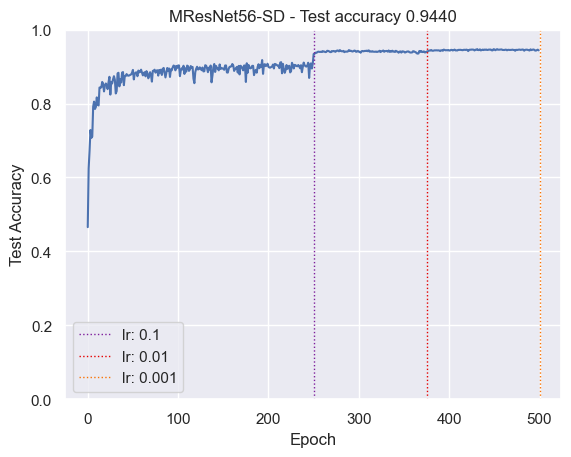

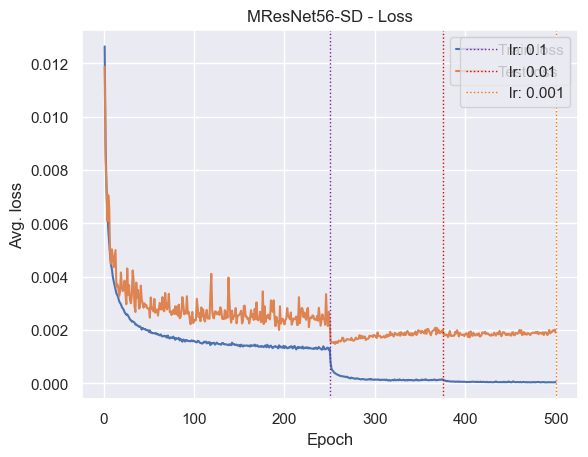

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 